<a href="https://colab.research.google.com/github/your-lithium/projector-project/blob/main/notebooks/training%2Btesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# choosing the model (experimentation)

In [ ]:
data = pd.read_csv('/content/data.csv', index_col=0)

In [ ]:
data.head()

,price,mark,model,year,equipment,mileage,place,gearbox,description,number,vin,vin_checked,accident,lease_available,seller_is_auto_ria,loan_years,loan_rate,mean_price,engine_power,tdi,ev,kwh,awd
0,13400,420.0,799.0,2016,59.0,50000,326.0,1.0,True,True,True,True,False,False,False,NaN,NaN,7864.613045,115.0,False,False,NaN,False
1,22000,50.0,3308.0,2013,NaN,181000,229.0,1.0,True,True,True,True,False,False,False,NaN,NaN,25987.084027,NaN,False,False,NaN,False
2,16500,263.0,3498.0,2012,59.0,19000,326.0,1.0,True,True,True,True,False,False,False,NaN,NaN,14491.356242,166.0,False,False,NaN,False
3,33999,50.0,3308.0,2014,295.0,250000,326.0,1.0,True,True,True,True,True,False,False,NaN,NaN,25987.084027,381.0,False,False,NaN,True
4,33500,50.0,257.0,2019,59.0,142000,326.0,1.0,True,True,True,True,False,False,False,NaN,NaN,25987.084027,190.0,False,False,NaN,True


## imports

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import StratifiedKFold

##splitting train/test + baseline

In [ ]:
features = [col for col in data.columns if data[col].dtype != 'O' and col != 'price']
features

['mark',
 'model',
 'year',
 'equipment',
 'mileage',
 'place',
 'gearbox',
 'description',
 'number',
 'vin',
 'vin_checked',
 'accident',
 'lease_available',
 'seller_is_auto_ria',
 'loan_years',
 'loan_rate',
 'mean_price',
 'engine_power',
 'tdi',
 'ev',
 'kwh',
 'awd']

In [ ]:
basic_features = ['mark', 'model', 'year', 'equipment', 'mileage', 'place']

In [ ]:
bin_count = 30
bin_numbers = pd.qcut(
    x=data['price'], q=bin_count, labels=False, duplicates='drop'
)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(data[features], data['price'], test_size=0.2, random_state=42, stratify=bin_numbers)

<Axes: >

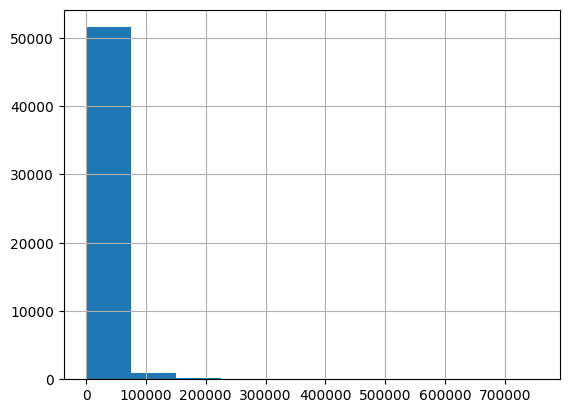

In [ ]:
train_labels.hist()

<Axes: >

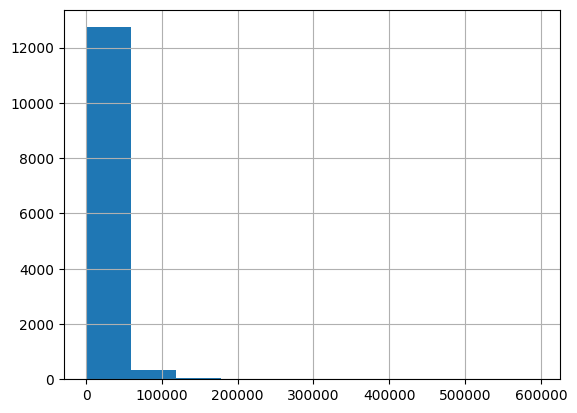

In [ ]:
test_labels.hist()

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
mean_squared_error(test_labels, test_features['mean_price'], squared=False)

18066.70637769775

## decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
dt_model = DecisionTreeRegressor(random_state=26)
param_grid = {'max_depth': [4, 5, 6],
              'max_features': [2, 3, 4, 5, 6],
              'min_samples_leaf': [5, 10, 15, 20]}

dt_model_grid = GridSearchCV(dt_model, param_grid, scoring='neg_root_mean_squared_error', cv=skf)

In [ ]:
dt_model_grid.fit(train_features[basic_features], train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=26),
             param_grid={'max_depth': [4, 5, 6],
                         'max_features': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='neg_root_mean_squared_error')

In [ ]:
dt_model_grid.best_score_

-16739.131005307714

In [ ]:
dt_model_grid.fit(train_features, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=26),
             param_grid={'max_depth': [4, 5, 6],
                         'max_features': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='neg_root_mean_squared_error')

In [ ]:
dt_model_grid.best_score_

-13591.439562824875

## random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state=26)
param_grid = {'max_depth': [4, 5, 6, 7, 8],
              'max_features': [2, 3, 4, 5, 6],
              'min_samples_leaf': [5, 10, 15, 20]}

rf_model_grid = GridSearchCV(rf_model, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=skf)

In [ ]:
rf_model_grid.fit(train_features, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=26), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='neg_root_mean_squared_error')

In [ ]:
rf_model_grid.best_score_

-9865.55208271198

## xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_train = xgb.DMatrix(train_features[basic_features], train_labels, feature_names=list(basic_features))

In [ ]:
num_rounds = 10000

In [ ]:
parameters = {
    "objective": "reg:squarederror",
    "eta": 0.1,
    "verbosity": 0,
    "nthread": 4,
    "random_seed": 26,
    "eval_metric": 'rmse',

    "max_leaves": 32,
    "subsample": 0.7,
    "colsample_bytree": 0.7,
    "max_depth": 4,

    "tree_method": "hist",
    "grow_policy": "lossguide"
}

In [ ]:
xgb_cv = xgb.cv(parameters, xgb_train, num_rounds, early_stopping_rounds=10,
                      folds=skf, verbose_eval=10)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0]	train-rmse:22027.40914+198.72816	test-rmse:22031.21793+769.59041
[10]	train-rmse:18144.73080+242.83288	test-rmse:18249.81611+889.56145
[20]	train-rmse:16588.94494+308.83596	test-rmse:16821.16601+841.45093
[30]	train-rmse:15668.42638+248.33717	test-rmse:16047.08362+910.63298
[40]	train-rmse:14940.23619+220.66856	test-rmse:15498.25880+925.98741
[50]	train-rmse:14517.64402+167.72996	test-rmse:15151.59420+948.06630
[60]	train-rmse:14135.12248+125.53252	test-rmse:14851.77623+949.98925
[70]	train-rmse:13786.15857+122.20045	test-rmse:14580.39027+931.21685
[80]	train-rmse:13484.30252+129.28048	test-rmse:14385.99993+900.65854
[90]	train-rmse:13197.11381+151.42977	test-rmse:14174.84135+932.32582
[100]	train-rmse:12950.33893+144.10122	test-rmse:13972.73090+908.82771
[110]	train-rmse:12760.62662+139.58354	test-rmse:13877.39952+878.89322
[120]	train-rmse:12601.23747+144.00544	test-rmse:13773.53863+873.32725
[130]	train-rmse:12461.70704+154.53395	test-rmse:13696.12247+898.27969
[140]	train-rmse:

In [ ]:
xgb_train = xgb.DMatrix(train_features, train_labels, feature_names=list(features))

In [ ]:
xgb_cv = xgb.cv(parameters, xgb_train, num_rounds, early_stopping_rounds=10,
                      folds=skf, verbose_eval=10)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0]	train-rmse:20983.41113+179.28884	test-rmse:21032.31282+804.82088
[10]	train-rmse:13762.12358+190.14169	test-rmse:14174.01605+1008.53592
[20]	train-rmse:11205.65574+218.86186	test-rmse:11849.48468+1113.88720
[30]	train-rmse:10222.79026+184.80117	test-rmse:10923.98589+1021.62634
[40]	train-rmse:9682.41164+220.46519	test-rmse:10485.53539+993.59060
[50]	train-rmse:9294.36849+210.68761	test-rmse:10176.40233+919.59173
[60]	train-rmse:8988.36249+178.05814	test-rmse:9915.32928+827.97311
[70]	train-rmse:8807.69555+186.28523	test-rmse:9760.72040+801.62105
[80]	train-rmse:8627.98955+169.66683	test-rmse:9640.56481+801.81591
[90]	train-rmse:8459.23018+144.72408	test-rmse:9528.10892+790.97867
[100]	train-rmse:8308.62501+118.04903	test-rmse:9446.21576+790.71416
[110]	train-rmse:8193.93204+108.87282	test-rmse:9379.03832+796.72797
[120]	train-rmse:8061.84705+95.97216	test-rmse:9316.16568+799.05845
[130]	train-rmse:7932.30247+82.60402	test-rmse:9243.55839+798.32517
[140]	train-rmse:7802.33113+80.631

## lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_train = lgb.Dataset(train_features[basic_features], train_labels, free_raw_data=False)

In [ ]:
n_rounds = 10000

In [ ]:
parameters = {
    #default
    "objective": "regression",
    "learning_rate": 0.1,
    "num_threads": 10,
    "seed": 26,

    #regularization
    "colsample_bytree": 0.9,
    "subsample": 0.9,
    "subsample_freq": 1,
    "min_data_in_leaf": 5,

    "verbose":-1
}

In [ ]:
# only basic features
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Training until validation scores don't improve for 10 rounds
[10]	cv_agg's train rmse: 15662.2 + 191.998	cv_agg's valid rmse: 16342.9 + 1073.6
[20]	cv_agg's train rmse: 13197.3 + 143.766	cv_agg's valid rmse: 14389.1 + 1271.81
[30]	cv_agg's train rmse: 11982.4 + 138.158	cv_agg's valid rmse: 13541.3 + 1356.95
[40]	cv_agg's train rmse: 11170.3 + 127.014	cv_agg's valid rmse: 13011.9 + 1415.25
[50]	cv_agg's train rmse: 10575.5 + 115.853	cv_agg's valid rmse: 12678 + 1439.98
[60]	cv_agg's train rmse: 10130.1 + 96.454	cv_agg's valid rmse: 12447.3 + 1446.8
[70]	cv_agg's train rmse: 9786.47 + 91.9401	cv_agg's valid rmse: 12268.8 + 1448.66
[80]	cv_agg's train rmse: 9484.13 + 95.1748	cv_agg's valid rmse: 12123.2 + 1437.66
[90]	cv_agg's train rmse: 9211.74 + 115.512	cv_agg's valid rmse: 12035.6 + 1460.86
[100]	cv_agg's train rmse: 8991.35 + 113.567	cv_agg's valid rmse: 11961.6 + 1446.51
[110]	cv_agg's train rmse: 8791.48 + 95.9277	cv_agg's valid rmse: 11892.9 + 1457.73
[120]	cv_agg's train rmse: 86

In [ ]:
# trying on all features
lgb_train = lgb.Dataset(train_features, train_labels, free_raw_data=False)

In [ ]:
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Training until validation scores don't improve for 10 rounds
[10]	cv_agg's train rmse: 11926.8 + 98.2858	cv_agg's valid rmse: 12386.9 + 770.38
[20]	cv_agg's train rmse: 8582.31 + 58.5633	cv_agg's valid rmse: 9406.19 + 542.881
[30]	cv_agg's train rmse: 7416.33 + 61.7671	cv_agg's valid rmse: 8429.96 + 439.978
[40]	cv_agg's train rmse: 6835.97 + 59.394	cv_agg's valid rmse: 7972.08 + 411.046
[50]	cv_agg's train rmse: 6462.93 + 48.7262	cv_agg's valid rmse: 7750.55 + 433.341
[60]	cv_agg's train rmse: 6186.35 + 50.852	cv_agg's valid rmse: 7611.46 + 477.022
[70]	cv_agg's train rmse: 5991.37 + 60.3977	cv_agg's valid rmse: 7478.86 + 483.556
[80]	cv_agg's train rmse: 5832.76 + 52.335	cv_agg's valid rmse: 7400.28 + 483.299
[90]	cv_agg's train rmse: 5690.05 + 52.0759	cv_agg's valid rmse: 7301.43 + 495.267
[100]	cv_agg's train rmse: 5566.6 + 60.9638	cv_agg's valid rmse: 7239.66 + 517.746
[110]	cv_agg's train rmse: 5454.05 + 50.3171	cv_agg's valid rmse: 7187.38 + 510.587
[120]	cv_agg's train rmse: 53

### tuning hyperparameters

In [ ]:
# going back to basic features to tune hyperparameters
lgb_train = lgb.Dataset(train_features[basic_features], train_labels, free_raw_data=False)

In [ ]:
# comparing to:
# [288]	cv_agg's train rmse: 6865.36 + 103.776	cv_agg's valid rmse: 11404.6 + 1463.85
# no improvement:
# [288]	cv_agg's train rmse: 6865.36 + 103.776	cv_agg's valid rmse: 11404.6 + 1463.85

parameters = {
    #default
    "objective": "regression",
    "learning_rate": 0.1,
    "num_threads": 10,
    "seed": 26,

    #regularization
    "colsample_bytree": 0.8,
    "subsample": 0.9,
    "subsample_freq": 1,
    "min_data_in_leaf": 5,

    "verbose":-1
}

result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])

In [ ]:
# comparing to:
# [288]	cv_agg's train rmse: 6865.36 + 103.776	cv_agg's valid rmse: 11404.6 + 1463.85
# no improvement:
# [288]	cv_agg's train rmse: 6866.14 + 96.7202	cv_agg's valid rmse: 11438.9 + 1465.21

parameters = {
    #default
    "objective": "regression",
    "learning_rate": 0.1,
    "num_threads": 10,
    "seed": 26,

    #regularization
    "colsample_bytree": 0.9,
    "subsample": 0.8,
    "subsample_freq": 1,
    "min_data_in_leaf": 5,

    "verbose":-1
}

result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])

In [ ]:
# comparing to:
# [288]	cv_agg's train rmse: 6865.36 + 103.776	cv_agg's valid rmse: 11404.6 + 1463.85
# no improvement:
# [265]	cv_agg's train rmse: 7753.3 + 147.225	cv_agg's valid rmse: 11414.7 + 1242.12

parameters = {
    #default
    "objective": "regression",
    "learning_rate": 0.1,
    "num_threads": 10,
    "seed": 26,

    #regularization
    "colsample_bytree": 0.9,
    "subsample": 0.9,
    "subsample_freq": 1,
    "min_data_in_leaf": 10,

    "verbose":-1
}

result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])

In [ ]:
# comparing to:
# [288]	cv_agg's train rmse: 6865.36 + 103.776	cv_agg's valid rmse: 11404.6 + 1463.85

parameters = {
    #default
    "objective": "regression",
    "learning_rate": 0.1,
    "num_threads": 10,
    "seed": 26,

    #regularization
    "colsample_bytree": 0.9,
    "subsample": 0.9,
    "subsample_freq": 1,
    "min_data_in_leaf": 4,

    "verbose":-1
}

result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])

In [ ]:
# comparing to:
# [288]	cv_agg's train rmse: 6620.47 + 79.2106	cv_agg's valid rmse: 11293.8 + 1370.64

parameters = {
    #default
    "objective": "regression",
    "learning_rate": 0.1,
    "num_threads": 10,
    "seed": 26,

    #regularization
    "colsample_bytree": 0.9,
    "subsample": 0.9,
    "subsample_freq": 1,
    "min_data_in_leaf": 3,

    "verbose":-1
}

result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])

In [ ]:
# comparing to:
# [333]	cv_agg's train rmse: 6056.79 + 56.3811	cv_agg's valid rmse: 11228.7 + 1356.46

parameters = {
    #default
    "objective": "regression",
    "learning_rate": 0.1,
    "num_threads": 10,
    "seed": 26,

    #regularization
    "colsample_bytree": 0.9,
    "subsample": 0.9,
    "subsample_freq": 1,
    "min_data_in_leaf": 2,

    "verbose":-1
}

result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])

In [ ]:
# comparing to:
# [408]	cv_agg's train rmse: 5370.67 + 43.3584	cv_agg's valid rmse: 11191.2 + 1486.99

parameters = {
    #default
    "objective": "regression",
    "learning_rate": 0.1,
    "num_threads": 10,
    "seed": 26,

    #regularization
    "colsample_bytree": 0.9,
    "subsample": 0.9,
    "subsample_freq": 1,
    "min_data_in_leaf": 1,

    "verbose":-1
}

result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])

In [ ]:
# comparing to:
# [509]	cv_agg's train rmse: 4668.7 + 33.683	cv_agg's valid rmse: 11048.4 + 1486.55
# no improvement:
# [290]	cv_agg's train rmse: 4522.88 + 43.5538	cv_agg's valid rmse: 11304.1 + 1362.17

parameters = {
    #default
    "objective": "regression",
    "learning_rate": 0.2,
    "num_threads": 10,
    "seed": 26,

    #regularization
    "colsample_bytree": 0.9,
    "subsample": 0.9,
    "subsample_freq": 1,
    "min_data_in_leaf": 1,

    "verbose":-1
}

result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])

In [ ]:
# comparing to:
# [509]	cv_agg's train rmse: 4668.7 + 33.683	cv_agg's valid rmse: 11048.4 + 1486.55

parameters = {
    #default
    "objective": "regression",
    "learning_rate": 0.05,
    "num_threads": 10,
    "seed": 26,

    #regularization
    "colsample_bytree": 0.9,
    "subsample": 0.9,
    "subsample_freq": 1,
    "min_data_in_leaf": 1,

    "verbose":-1
}

result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])

In [ ]:
# comparing to:
# [1178]	cv_agg's train rmse: 4428.07 + 42.1315	cv_agg's valid rmse: 10832.1 + 1635.94
# no improvement:
# [704]	cv_agg's train rmse: 4617.56 + 40.6597	cv_agg's valid rmse: 10947.4 + 1572.78

parameters = {
    #default
    "objective": "regression",
    "learning_rate": 0.075,
    "num_threads": 10,
    "seed": 26,

    #regularization
    "colsample_bytree": 0.9,
    "subsample": 0.9,
    "subsample_freq": 1,
    "min_data_in_leaf": 1,

    "verbose":-1
}

result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])

In [ ]:
# comparing to:
# [1178]	cv_agg's train rmse: 4428.07 + 42.1315	cv_agg's valid rmse: 10832.1 + 1635.94
# the same result
# the best parameters as they allow for stronger regularisation with the same result

parameters = {
    #default
    "objective": "regression",
    "learning_rate": 0.05,
    "num_threads": 10,
    "seed": 26,

    #regularization
    "colsample_bytree": 0.8,
    "subsample": 0.9,
    "subsample_freq": 1,
    "min_data_in_leaf": 1,

    "verbose":-1
}

result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])

In [ ]:
# comparing to:
# [1178]	cv_agg's train rmse: 4428.07 + 42.1315	cv_agg's valid rmse: 10832.1 + 1635.94
# no improvement:
# [853]	cv_agg's train rmse: 4958.04 + 45.2417	cv_agg's valid rmse: 10849.4 + 1496.4

parameters = {
    #default
    "objective": "regression",
    "learning_rate": 0.05,
    "num_threads": 10,
    "seed": 26,

    #regularization
    "colsample_bytree": 0.8,
    "subsample": 0.8,
    "subsample_freq": 1,
    "min_data_in_leaf": 1,

    "verbose":-1
}

result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])

### testing features

In [ ]:
parameters = {
    #default
    "objective": "regression",
    "learning_rate": 0.05,
    "num_threads": 10,
    "seed": 26,

    #regularization
    "colsample_bytree": 0.8,
    "subsample": 0.9,
    "subsample_freq": 1,
    "min_data_in_leaf": 1,

    "verbose":-1
}

In [ ]:
# adding other features one by one and testing them
[x for x in features if x not in basic_features]

['gearbox',
 'description',
 'number',
 'vin',
 'vin_checked',
 'accident',
 'lease_available',
 'seller_is_auto_ria',
 'loan_years',
 'loan_rate',
 'mean_price',
 'engine_power',
 'tdi',
 'ev',
 'kwh',
 'awd']

In [ ]:
# comparing to:
# [1178]	cv_agg's train rmse: 4428.07 + 42.1315	cv_agg's valid rmse: 10832.1 + 1635.94
# no improvement:
# [955]	cv_agg's train rmse: 4615.34 + 32.6475	cv_agg's valid rmse: 10953.2 + 1569.08

add_features = basic_features + ['gearbox']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])

In [ ]:
# comparing to:
# [1178]	cv_agg's train rmse: 4428.07 + 42.1315	cv_agg's valid rmse: 10832.1 + 1635.94

add_features = basic_features + ['description']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

In [ ]:
# comparing to:
# [1125]	cv_agg's train rmse: 4473.48 + 48.7744	cv_agg's valid rmse: 10797.9 + 1536.58
# no improvement:
# [893]	cv_agg's train rmse: 4933.43 + 46.6908	cv_agg's valid rmse: 10836.7 + 1541.58

basic_features = add_features[:]
add_features = basic_features + ['number']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

In [ ]:
# comparing to:
# [1125]	cv_agg's train rmse: 4473.48 + 48.7744	cv_agg's valid rmse: 10797.9 + 1536.58
# no improvement:
# [892]	cv_agg's train rmse: 4909.06 + 36.7725	cv_agg's valid rmse: 10887.2 + 1559.33

add_features = basic_features + ['vin']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

In [ ]:
# comparing to:
# [1125]	cv_agg's train rmse: 4473.48 + 48.7744	cv_agg's valid rmse: 10797.9 + 1536.58
# no improvement:
# [893]	cv_agg's train rmse: 4904.21 + 43.5635	cv_agg's valid rmse: 10803.2 + 1541.19

add_features = basic_features + ['vin_checked']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

In [ ]:
# comparing to:
# [1125]	cv_agg's train rmse: 4473.48 + 48.7744	cv_agg's valid rmse: 10797.9 + 1536.58

add_features = basic_features + ['accident']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

In [ ]:
# comparing to:
# [1179]	cv_agg's train rmse: 4440.04 + 39.549	cv_agg's valid rmse: 10759.8 + 1668.34
# no improvement:
# [1052]	cv_agg's train rmse: 4610.72 + 40.4651	cv_agg's valid rmse: 10843.2 + 1454.77

basic_features = add_features[:]
add_features = basic_features + ['lease_available']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

In [ ]:
# comparing to:
# [1179]	cv_agg's train rmse: 4440.04 + 39.549	cv_agg's valid rmse: 10759.8 + 1668.34
# no improvement:
# [1036]	cv_agg's train rmse: 4644.43 + 30.4313	cv_agg's valid rmse: 10768.9 + 1454.34

add_features = basic_features + ['seller_is_auto_ria']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

In [ ]:
# comparing to:
# [1179]	cv_agg's train rmse: 4440.04 + 39.549	cv_agg's valid rmse: 10759.8 + 1668.34
# no improvement:
# [890]	cv_agg's train rmse: 4844.62 + 23.2649	cv_agg's valid rmse: 10930 + 1531.46

add_features = basic_features + ['loan_years']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

In [ ]:
# comparing to:
# [1179]	cv_agg's train rmse: 4440.04 + 39.549	cv_agg's valid rmse: 10759.8 + 1668.34
# no improvement:
# [968]	cv_agg's train rmse: 4716.37 + 36.0784	cv_agg's valid rmse: 10892.1 + 1547.78

add_features = basic_features + ['loan_rate']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

In [ ]:
# comparing to:
# [1179]	cv_agg's train rmse: 4440.04 + 39.549	cv_agg's valid rmse: 10759.8 + 1668.34

add_features = basic_features + ['mean_price']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

In [ ]:
# comparing to:
# [847]	cv_agg's train rmse: 4363.29 + 22.8011	cv_agg's valid rmse: 7309.19 + 372.785

basic_features = add_features[:]
add_features = basic_features + ['engine_power']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

In [ ]:
# comparing to:
# [661]	cv_agg's train rmse: 4029.77 + 44.9731	cv_agg's valid rmse: 6910.81 + 449.764
# no improvement:
# [661]	cv_agg's train rmse: 4014.69 + 45.5244	cv_agg's valid rmse: 7011.03 + 527.447

basic_features = add_features[:]
add_features = basic_features + ['tdi']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

In [ ]:
# comparing to:
# [661]	cv_agg's train rmse: 4029.77 + 44.9731	cv_agg's valid rmse: 6910.81 + 449.764
# no improvement:
# [524]	cv_agg's train rmse: 4297.46 + 28.0151	cv_agg's valid rmse: 7092.95 + 513.634

add_features = basic_features + ['ev']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

In [ ]:
# comparing to:
# [661]	cv_agg's train rmse: 4029.77 + 44.9731	cv_agg's valid rmse: 6910.81 + 449.764
# no improvement:
# [605]	cv_agg's train rmse: 4108.67 + 44.5412	cv_agg's valid rmse: 7048.94 + 506.985

add_features = basic_features + ['kwh']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

In [ ]:
# comparing to:
# [661]	cv_agg's train rmse: 4029.77 + 44.9731	cv_agg's valid rmse: 6910.81 + 449.764
# no improvement:
# [790]	cv_agg's train rmse: 3788.51 + 54.1642	cv_agg's valid rmse: 6941.01 + 521.993

add_features = basic_features + ['awd']
lgb_train = lgb.Dataset(train_features[add_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

### final model

In [ ]:
final_features = ['mark', 'model', 'year', 'equipment', 'mileage', 'place',
                  'description', 'accident', 'mean_price', 'engine_power']

In [ ]:
lgb_train = lgb.Dataset(train_features[final_features], train_labels, free_raw_data=False)
result = lgb.cv(parameters, lgb_train, n_rounds, folds=skf, metrics='rmse', eval_train_metric=True, callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Training until validation scores don't improve for 10 rounds
[50]	cv_agg's train rmse: 7907.31 + 38.1611	cv_agg's valid rmse: 9064.25 + 482.224
[100]	cv_agg's train rmse: 6372.83 + 31.6641	cv_agg's valid rmse: 7828.04 + 455.478
[150]	cv_agg's train rmse: 5801.66 + 31.4526	cv_agg's valid rmse: 7496.5 + 442.203
[200]	cv_agg's train rmse: 5445.96 + 30.2927	cv_agg's valid rmse: 7346.26 + 444.411
[250]	cv_agg's train rmse: 5177.13 + 21.3026	cv_agg's valid rmse: 7245.13 + 448.274
[300]	cv_agg's train rmse: 4959.52 + 23.1718	cv_agg's valid rmse: 7168.96 + 460.387
[350]	cv_agg's train rmse: 4779.4 + 31.6643	cv_agg's valid rmse: 7112.6 + 465.485
[400]	cv_agg's train rmse: 4624.67 + 29.1761	cv_agg's valid rmse: 7069.66 + 461.119
[450]	cv_agg's train rmse: 4494.78 + 32.9712	cv_agg's valid rmse: 7041.6 + 465.789
[500]	cv_agg's train rmse: 4366.21 + 40.1258	cv_agg's valid rmse: 6999.96 + 462.22
[550]	cv_agg's train rmse: 4250.23 + 37.6963	cv_agg's valid rmse: 6977.85 + 450.544
[600]	cv_agg's train 

In [ ]:
lgb_model = lgb.train(parameters, lgb_train, num_boost_round=len(result['train rmse-mean']))

In [ ]:
lgb_model.save_model('model.txt', num_iteration=lgb_model.best_iteration)

# testing (the result)

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_model = lgb.Booster(model_file='/content/model.txt')

In [ ]:
lgb_prediction = lgb_model.predict(test_features[final_features])

In [ ]:
lgb_prediction

array([15987.81789831,   168.82007802,  9606.13311232, ...,
       10239.61896605, 23830.85579312, 13955.77796345])

In [ ]:
mean_squared_error(test_labels, lgb_prediction, squared=False)

7874.002275147693